> # # **PROYECTO: RECOMENDACIÓN DE PRODUCTOS BANCARIOS A CLIENTES**

![](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Santander_Argentina_Logo.png/1200px-Santander_Argentina_Logo.png)


> # **Sección 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)**
![](https://cdn-icons-png.flaticon.com/128/6020/6020458.png)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Tratamiento de datos
import numpy as np                    
import pandas as pd
!pip install prettytable
from prettytable import PrettyTable
import warnings
# Gráficos
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt # El modulo Pyplot de Matplotlib
!pip install seaborn
import seaborn as sns                 # Importar Seaborn
#from sklearn.preprocessing import scale
!pip install scikit-learn
from sklearn import preprocessing  # Import label encoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split #para separar en train y test
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
# Modelos de Clasificacion:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# MULTINOMIAL NAVES BAYES
from sklearn.naive_bayes import MultinomialNB
# LIGHT GBM
!pip install lightgbm
import lightgbm as lgb
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
!pip install xgboost
import xgboost 
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import plot_importance
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('¡Librerías importadas con éxito!')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
¡Librerías importadas con éxito!


In [ ]:
#Lectura de dataset (archivo csv)
clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)
# Muestra de las diez primeras filas del dataset
clientes.head(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   
5  2015-01-28   1050615            N              ES    H   23  2012-08-10   
6  2015-01-28   1050616            N              ES    H   23  2012-08-10   
7  2015-01-28   1050617            N              ES    H   23  2012-08-10   
8  2015-01-28   1050619            N              ES    H   24  2012-08-10   
9  2015-01-28   1050620            N              ES    H   23  2012-08-10   

   ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1 ind_plan_fin_ult1  \
0        0.0          6     1.0  ...                0                 0   
1        0.0         35     1.0  ...                0                 0   
2        0.0         35     1.0  ...                0                 0   
3        0.0         35     1.0  ...                0                 0   
4        0.0         35     1.0  ...                0                 0   
5        0.0         35     1.0  ...                0                 0   
6        0.0         35     1.0  ...                0                 0   
7        0.0         35     1.0  ...                0                 0   
8        0.0         35     1.0  ...                0                 0   
9        0.0         35     1.0  ...                0                 0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   
5                 0                 0                 0                 0   
6                 0                 0                 0                 0   
7                 0                 0                 0                 0   
8                 0                 0                 0                 0   
9                 0                 0                 0                 0   

  ind_viv_fin_ult1 ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1  
0                0             0.0                0.0                0  
1                0             0.0                0.0                0  
2                0             0.0                0.0                0  
3                0             0.0                0.0                0  
4                0             0.0                0.0                0  
5                0             0.0                0.0                0  
6                0             0.0                0.0                0  
7                0             0.0                0.0                0  
8                0             0.0                0.0                0  
9                0             0.0                0.0                0  

[10 rows x 48 columns]

Dado que el conjunto de datos aún es muy abstracto y hasta el momento solo recopilamos información de alto nivel, ahora queremos obtener más información sobre los clientes. Para hacer esto, visualizaremos varias métricas que luego nos ayudarán a modelar un algoritmo optimizado de recomendación de productos.
Se plantean los siguientes interrogantes a responder mediante la exploración y análisis de los datos:
1. ¿Cómo evolucionó mensualmente la cartera de clientes?
2. ¿De qué ciudad provienen los clientes?
3. ¿Existe una dependencia entre el período del año y la solicitud de alta de los clientes?
4. ¿Qué rango de edad presenta la cartera de clientes?
5. Teniendo en cuenta la cartera de clientes ¿que género y segmento predomina?
6. ¿Existe alguna relación entre la edad de los clientes y su fecha de alta?
7. ¿Qué paquete bancario es el más demandado?
8. ¿Cuál fue la tendencia de compra mensual?
9. ¿Existe relación entre el ingreso de los clientes y los paquetes adquiridos?
10. ¿Existe relación entre género de los clientes y los paquetes adquiridos?
11. ¿Existe relación entre la edad de los clientes y los paquetes adquiridos?
12. ¿Cómo es el comportamiento de compra de clientes nuevos y antiguos?
13. ¿Cómo es el comportamiento de compra de clientes según el segmento al que pertenecen?
14. ¿Qué canal de compra predomina?
15. ¿Existe relación entre el canal de entrada y los paquetes adquiridos?
16. ¿Existe relación entre la antiguedad de los clientes y los paquetes adquiridos?

**3.1 ANÁLISIS GENERAL DE DATOS DEL DATASET**

In [ ]:
#Estructura del Dataset
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [ ]:
#Conteo de nulos
clientes.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [ ]:
#Se verifica si hay líneas duplicadas
clientes.duplicated().any()

False

In [ ]:
#Tabla resumen campos del Dataset
# Genero una función que realiza una tabla resumen de los campos del dataframe

def df_resumen(df):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column','Type','Non-Null','Nulls','Unique','Example'])
    
    for c in df.columns:
        t.add_row([c,df[c].dtype,len(df[c])-np.sum(df[c].isna()),np.sum(df[c].isna()),np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_resumen(clientes)

Shape:  (13647309, 48)
+-----------------------+---------+----------+----------+--------+-------------------+
|         Column        |   Type  | Non-Null |  Nulls   | Unique |      Example      |
+-----------------------+---------+----------+----------+--------+-------------------+
|       fecha_dato      |  object | 13647309 |    0     |   17   |     2015-01-28    |
|        ncodpers       |  int64  | 13647309 |    0     | 956645 |      1375586      |
|      ind_empleado     |  object | 13619575 |  27734   |   6    |         N         |
|    pais_residencia    |  object | 13619575 |  27734   |  119   |         ES        |
|          sexo         |  object | 13619505 |  27804   |   3    |         H         |
|          age          |  object | 13647309 |    0     |  235   |         35        |
|       fecha_alta      |  object | 13619575 |  27734   |  6757  |     2015-01-12    |
|       ind_nuevo       | float64 | 13619575 |  27734   |   2    |        0.0        |
|       antiguedad  

In [ ]:
#se verifican valores únicos de variables tipo object
def df_unique_val_col(df, col_list = [] ):
    
    #Cuento la máxima cantidad de valores unicos que tienen los campos
    cant_table_col = 0
    for i in col_list:
        l = len(df[i].unique())
        if cant_table_col < l:
            cant_table_col = l
    
    # Creo la lista de campos "value_x" para armar el indice y definir el tamaño de la tabla (alto)
    A = []
    for i in range(cant_table_col):
        A.append('Value : '+str(i))
    
    #creo un dataframe vacio
    dg = pd.DataFrame(index = A,
                          columns = df[col_list].columns)    

    #Completo el dataframe con los valores unicos sino lo lleno con '-'
    for m in df[col_list]:
        uni = df[m].unique()
        le = len(uni)
        
        for j in range(cant_table_col):
            if j < le:
                dg[m][j] = uni[j]
            else:
                dg[m][j] = '-'

    print('Valores únicos de algunos campos de interes')
    return dg

# Variables de tipo object:
Ob = ['pais_residencia','ind_empleado','sexo','ind_nuevo','indrel_1mes','tiprel_1mes','indresi','indext','canal_entrada', 'indfall','nomprov','segmento']
df_unique_val_col(clientes,Ob)

Valores únicos de algunos campos de interes


pais_residencia ind_empleado sexo ind_nuevo indrel_1mes  \
Value : 0                ES            N    H       0.0         1.0   
Value : 1               NaN          NaN    V       NaN         NaN   
Value : 2                CA            A  NaN       1.0         3.0   
Value : 3                CH            B    -         -         2.0   
Value : 4                CL            F    -         -         1.0   
...                     ...          ...  ...       ...         ...   
Value : 158               -            -    -         -           -   
Value : 159               -            -    -         -           -   
Value : 160               -            -    -         -           -   
Value : 161               -            -    -         -           -   
Value : 162               -            -    -         -           -   

            tiprel_1mes indresi indext canal_entrada indfall      nomprov  \
Value : 0             A       S      N           KHL       N       MALAGA   
Value : 1             I     NaN      S           KHE     NaN  CIUDAD REAL   
Value : 2           NaN       N    NaN           KHD       S     ZARAGOZA   
Value : 3             P       -      -           KFA       -       TOLEDO   
Value : 4             R       -      -           KFC       -         LEON   
...                 ...     ...    ...           ...     ...          ...   
Value : 158           -       -      -           KDL       -            -   
Value : 159           -       -      -           025       -            -   
Value : 160           -       -      -           KHP       -            -   
Value : 161           -       -      -           KHR       -            -   
Value : 162           -       -      -           KHS       -            -   

                       segmento  
Value : 0     02 - PARTICULARES  
Value : 1    03 - UNIVERSITARIO  
Value : 2                   NaN  
Value : 3              01 - TOP  
Value : 4                     -  
...                         ...  
Value : 158                   -  
Value : 159                   -  
Value : 160                   -  
Value : 161                   -  
Value : 162                   -  

[163 rows x 12 columns]

**3.2 ESTADÍSTICA DESCRIPTIVA**

In [ ]:
#Principales medidas estadísticas
clientes.describe().round(2).T

count       mean        std       min        25%  \
ncodpers               13647309.0  834904.21  431565.03  15889.00  452813.00   
ind_nuevo              13619575.0       0.06       0.24      0.00       0.00   
indrel                 13619575.0       1.18       4.18      1.00       1.00   
tipodom                13619574.0       1.00       0.00      1.00       1.00   
cod_prov               13553718.0      26.57      12.78      1.00      15.00   
ind_actividad_cliente  13619575.0       0.46       0.50      0.00       0.00   
renta                  10852934.0  134254.32  230620.24   1202.73   68710.98   
ind_ahor_fin_ult1      13647309.0       0.00       0.01      0.00       0.00   
ind_aval_fin_ult1      13647309.0       0.00       0.00      0.00       0.00   
ind_cco_fin_ult1       13647309.0       0.66       0.48      0.00       0.00   
ind_cder_fin_ult1      13647309.0       0.00       0.02      0.00       0.00   
ind_cno_fin_ult1       13647309.0       0.08       0.27      0.00       0.00   
ind_ctju_fin_ult1      13647309.0       0.01       0.10      0.00       0.00   
ind_ctma_fin_ult1      13647309.0       0.01       0.10      0.00       0.00   
ind_ctop_fin_ult1      13647309.0       0.13       0.34      0.00       0.00   
ind_ctpp_fin_ult1      13647309.0       0.04       0.20      0.00       0.00   
ind_deco_fin_ult1      13647309.0       0.00       0.04      0.00       0.00   
ind_deme_fin_ult1      13647309.0       0.00       0.04      0.00       0.00   
ind_dela_fin_ult1      13647309.0       0.04       0.20      0.00       0.00   
ind_ecue_fin_ult1      13647309.0       0.08       0.28      0.00       0.00   
ind_fond_fin_ult1      13647309.0       0.02       0.13      0.00       0.00   
ind_hip_fin_ult1       13647309.0       0.01       0.08      0.00       0.00   
ind_plan_fin_ult1      13647309.0       0.01       0.10      0.00       0.00   
ind_pres_fin_ult1      13647309.0       0.00       0.05      0.00       0.00   
ind_reca_fin_ult1      13647309.0       0.05       0.22      0.00       0.00   
ind_tjcr_fin_ult1      13647309.0       0.04       0.21      0.00       0.00   
ind_valo_fin_ult1      13647309.0       0.03       0.16      0.00       0.00   
ind_viv_fin_ult1       13647309.0       0.00       0.06      0.00       0.00   
ind_nomina_ult1        13631246.0       0.05       0.23      0.00       0.00   
ind_nom_pens_ult1      13631246.0       0.06       0.24      0.00       0.00   
ind_recibo_ult1        13647309.0       0.13       0.33      0.00       0.00   

                            50%         75%          max  
ncodpers               931893.0  1199286.00   1553689.00  
ind_nuevo                   0.0        0.00         1.00  
indrel                      1.0        1.00        99.00  
tipodom                     1.0        1.00         1.00  
cod_prov                   28.0       35.00        52.00  
ind_actividad_cliente       0.0        1.00         1.00  
renta                  101850.0   155955.96  28894395.51  
ind_ahor_fin_ult1           0.0        0.00         1.00  
ind_aval_fin_ult1           0.0        0.00         1.00  
ind_cco_fin_ult1            1.0        1.00         1.00  
ind_cder_fin_ult1           0.0        0.00         1.00  
ind_cno_fin_ult1            0.0        0.00         1.00  
ind_ctju_fin_ult1           0.0        0.00         1.00  
ind_ctma_fin_ult1           0.0        0.00         1.00  
ind_ctop_fin_ult1           0.0        0.00         1.00  
ind_ctpp_fin_ult1           0.0        0.00         1.00  
ind_deco_fin_ult1           0.0        0.00         1.00  
ind_deme_fin_ult1           0.0        0.00         1.00  
ind_dela_fin_ult1           0.0        0.00         1.00  
ind_ecue_fin_ult1           0.0        0.00         1.00  
ind_fond_fin_ult1           0.0        0.00         1.00  
ind_hip_fin_ult1            0.0        0.00         1.00  
ind_plan_fin_ult1           0.0        0.00         1.00  
ind_pres_fin_ult1           0.0        0.00        

In [ ]:
#Graficamos un describe con colores gradientes para visualizar posibles outliers
temp = clientes.describe()
temp.style.background_gradient(cmap='Oranges')

**3.3 USANDO PANDAS PROFILING**

Debido al tamaño del conjunto de datos se genera el informe para una parte del mismo. Para ello se seleccionaron 1.000.000 de muestras al azar. 

In [ ]:
clientes=clientes.sample(n=1000000)
#Data Profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(clientes)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Interpretando los resultados**

**Pandas profile** proporciona información muy valiosa que va más allá de lo que se puede obtener con la función describe() de Pandas. Algunas de las diferencias más destacadas son:

1. En la sección "Overview" se puede ver si hay filas duplicadas en el dataset, lo que puede ser un problema si se desea hacer un análisis preciso. Además, se muestra la cantidad de filas y columnas que tiene el dataset.
2. En la sección "Warnings" se puede ver si hay correlación alta entre las columnas. Este tipo de información puede ser muy útil para ajustar los modelos y evitar overfitting.
3. En la sección "Variables" se hace un análisis detallado de cada columna/variable, mostrando estadísticas importantes como la media, mediana y desviación estándar, entre otras. Además, se indica si hay valores nulos en alguna columna.
4. En la sección "Interactions" se muestran diferentes gráficos para visualizar las relaciones entre las variables, lo que puede ayudar a identificar patrones y tendencias en los datos.
5. En la sección "Correlations" se muestra una matriz de correlaciones, lo que permite entender la interdependencia entre las variables. Esto puede ser útil para seleccionar variables relevantes y para ajustar modelos.
6. En la sección "Missing Values" se muestra la cantidad de valores nulos por columna. Esto es importante porque puede afectar la calidad del modelo y se pueden tomar decisiones sobre cómo tratar esos valores nulos.

**En general, esta descripción del dataset es muy completa y permite tener una mejor comprensión del mismo, lo que puede ayudar a tomar decisiones más informadas al analizar y modelar los datos.**

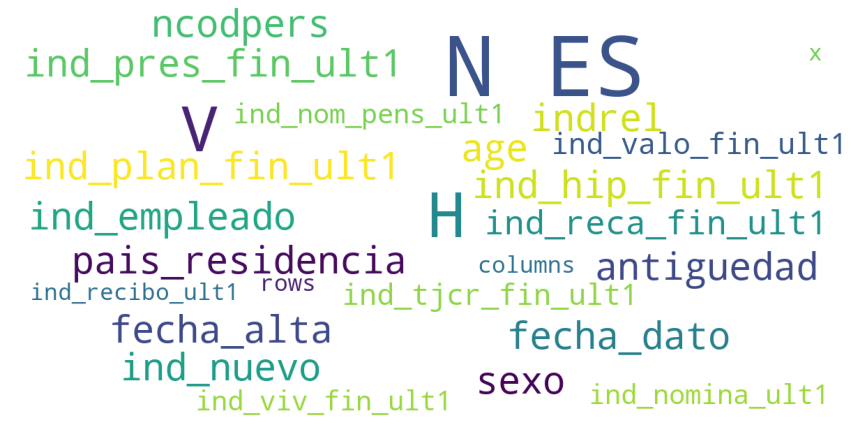

In [ ]:
import re
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #traemos la librería para generar nubes de palabras

def repeticion_variables(df_clean1, title = None):
    wordcloud = WordCloud(
                background_color='white',
                stopwords = set(STOPWORDS)
                max_words=30,
                max_font_size=40,
                scale=3,
                random_state=1
    ).generate(str(df_clean1))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

repeticion_variables(clientes) 

**3.4 RESUMEN NUMÉRICO DE VARIABLES**

In [ ]:
import numpy as np
print("Resúmenes numéricos básicos de los clientes")
grupo_clientes= clientes['ncodpers'].value_counts()
len_unique_c=len(grupo_clientes)
print(f"Hay {len_unique_c} clientes únicos ")
clientes["age"] = pd.to_numeric(clientes["age"],errors = 'coerce')
mean_age = float(clientes['age'].mean())
mean_age = round(mean_age)
print("La edad promedio de los clientes es: ", mean_age)
mean_ingresos = clientes['renta'].mean()
mean_ingresos = round(mean_ingresos)
print(f"El ingreso promedio de los clientes es {mean_ingresos}")
clientes["antiguedad"] = pd.to_numeric(clientes["antiguedad"],errors = 'coerce')
mean_antiguedad = clientes['antiguedad'].mean()
mean_antiguedad = round(mean_antiguedad)
print(f"La antiguedad promedio de los clientes es {mean_antiguedad} meses")

Resúmenes numéricos básicos de los clientes
Hay 956645 clientes únicos 
La edad promedio de los clientes es:  40
El ingreso promedio de los clientes es 134254
La antiguedad promedio de los clientes es 77 meses
